## 복습
- 기술통계량 : describe()
- 변동계수(cv) = std/mean => 공분산 떄문에(Cov) y에 영향 추정,
  공분산의 영향을 제외 시켜서 표준화된 수치로 만듬 => 상관 계수
- 확률 분포 : 정규분포,표준정규분포 => 평균을 추정하거나 검정할때 쓴다. 평균(시그마를 알고있을 때 쓴다.)
- t-분포 : 평균(시그마를 모른다.), 평균의 표준편차를 바꿔서 사용, 자유도 사용
- 카이스퀘어,카이제곱- 분포(x^2) : (시그마 제곱사용) 분산을 추정할 때 사용 , 자유도 , 흔들린다. , 동일성 검정(단측 검정) , 시그마 제곱은 (양측 검정) 출발점이 0이다.
- F - 분포 : 분산 비 F = 시그마1^2/시그마2^2 , 등분산성 검정(두 집단의 분산이 같냐 검정) , ANOVA (3개 집단 이상)


### 가설검정
출입된 가설이 있으니깐 검정을 하는 것이다.

- 모집단이 정규 분포를 띈다는 가정이 깔려있음
- 귀무가설(H0)
- 대립가설(H1)

- 유의 수준 : 1종오류 (a=0.05)
- 신뢰수준 : (1-a)
- 신뢰구간 : 임계치와 임계치 사이의 거리

- 중심극한 정리 표준정규분포 식이 검정 통계량이 된다고 한다.
  - 검정통계량이 신뢰구간 안에 있으면 귀무가설
  - 검정통계량이 신뢰구간 밖에 있으면 대립가설

In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest# 환경 설정

import matplotlib
# 한글 설치(윈도우 버전)
matplotlib.rc('font',family='Malgun Gothic')
# 음수 표시
matplotlib.rc('axes',unicode_minus=False)
# 그래프 출력
%matplotlib inline

# 실행결과 경고메시지 출력 제외
import warnings
warnings.filterwarnings('ignore')

In [4]:
# 1 Proportion test
count = 15
n_obs =100
value = 0.1

z,p = proportions_ztest(count,n_obs,value)

print("1 Proportion test")
print(" z: {0:0.3f}".format(z))
print(" p: {0:0.3f}".format(p))

1 Proportion test
 z: 1.400
 p: 0.161


In [5]:
# 1 Proportion test
count = 45
n_obs =300 # 표본 수가 영향을 미친다.
value = 0.1

z,p = proportions_ztest(count,n_obs,value)

print("1 Proportion test")
print(" z: {0:0.3f}".format(z))
print(" p: {0:0.3f}".format(p))

1 Proportion test
 z: 2.425
 p: 0.015


In [6]:
# 1 Proportion test 실습
count = 40
n_obs =100 # 표본 수가 영향을 미친다.
value = 0.5

z,p = proportions_ztest(count,n_obs,value)

print("1 Proportion test")
print(" z: {0:0.3f}".format(z))
print(" p: {0:0.3f}".format(p))

# p가 0.04로 0.05보다 작기때문에 귀무가설 기각 대립가설 채택 앞면이 나올 확률은 50%가 아니다.
# 검정통계량이 음수이므로 앞면이 더 많이 나온다?

# p-value < 0.05이므로 귀무가설을 기각할 수 있다. 이는 앞면이 나올 확률이 50%가 아니라는 것을 의미한다.
# 검정통계량 z가 음수이므로 앞면이 나올 확률이 50%보다 작다는 것을 의미한다.

1 Proportion test
 z: -2.041
 p: 0.041


In [7]:
# 2 Proportion test 연습
count = np.array([4,1])
n_obs =np.array([1000,1200])


z,p = proportions_ztest(count,n_obs)

print("2 Proportion test")
print(" z: {0:0.3f}".format(z))
print(" p: {0:0.3f}".format(p))

# p-value > 0.05 이기에 귀무가설 채택 두 공정의 불량률이 같다


2 Proportion test
 z: 1.553
 p: 0.120


In [8]:
# 2 Proportion test 실습
count = np.array([14,5])
n_obs =np.array([1200,1200])


z,p = proportions_ztest(count,n_obs)

print("2 Proportion test")
print(" z: {0:0.3f}".format(z))
print(" p: {0:0.3f}".format(p))

# p-value <0.05이기에 귀무가설 기각 두 공정의 불량률이 같지 않다
# 검정통계량이 양수라서 공장1의 불량률이 더 크다?


# p-value < 0.05이므로 귀무가설을 기각할 수 있다. 이는 두 공정의 불량률이 같지 않다는 것을 의미한다.
# 검정통계량 z가 양수이므로 첫 번째 공정의 불량률이 두 번째 공정의 불량률보다 크다는 것을 의미한다.

2 Proportion test
 z: 2.073
 p: 0.038


In [9]:
# 카이제곱 검정 통계량_연습
df = pd.DataFrame({'Work_1':[270,228,227],
                  'Work_2':[260,285,284],
                  'Work_3':[236,225,231],
                  'Work_4':[234,262,208]})

chi,pval,dof,expected = stats.chi2_contingency(df)

print("chi-square test")
print(" chisq: {0:0.3f}".format(chi))
print(" p: {0:0.3f}".format(pval))

print(" degree pf freedom : {}".format(dof))
print(" expected value: \n{}".format(expected.round(4)))

# pvalue가 0.05보다 크기 때문에 대립가설 
# 근무 조별로 제품을 생산하는 부하 차이가 있다고 할 수 있다.

# chisq 실측치 대비 기대치의 차이가 크다는 것을 의미함?

chi-square test
 chisq: 11.187
 p: 0.083
 degree pf freedom : 6
 expected value: 
[[245.7627 281.0169 234.5763 238.6441]
 [245.7627 281.0169 234.5763 238.6441]
 [233.4746 266.9661 222.8475 226.7119]]


In [10]:
# 노트북 컴퓨터의 6가지 제품 (A,B,C,D,E,F)에 대하여 7가지 제품의 이미지를 중복 선택 할 수 있도록 
# 32명의 소비자를 대상으로 설문조사한 Table 이다. 각 제품에 대해 이미지에 대해
# 차이가 있겠는가?(유의수준 0.05)
df = pd.DataFrame({'A':[18,1,8,7,10,9,10],
                  'B':[8,2,14,5,5,9,4],
                  'C':[4,1,3,4,9,5,4],
                  'D':[4,1,2,3,2,7,3,],
                  'E':[3,1,3,1,1,1,1,],
                  'F':[3,25,8,10,2,1,7,]})

chi,pval,dof,expected = stats.chi2_contingency(df)

print("chi-square test")
print(" chisq: {0:0.3f}".format(chi))
print(" p: {0:0.3f}".format(pval))

print(" degree pf freedom : {}".format(dof))
print(" expected value: \n{}".format(expected.round(4)))

# pvalue 가 0.05보다 작기 때문에 귀무가설 기각 대립가설 채택 
# 각 제품에 대해 이미지에 대해 차이가 있다.
# 뭔진 모르지만 차이가 나는게 1개 이상 있다는 것이다.
# 자유도 29

# chisq 실측치 대비 기대치의 차이가 크다는 것을 의미함?

chi-square test
 chisq: 98.274
 p: 0.000
 degree pf freedom : 30
 expected value: 
[[11.0044  8.2096  5.2402  3.8428  1.9214  9.7817]
 [ 8.5284  6.3624  4.0611  2.9782  1.4891  7.5808]
 [10.4541  7.7991  4.9782  3.6507  1.8253  9.2926]
 [ 8.2533  6.1572  3.9301  2.8821  1.441   7.3362]
 [ 7.9782  5.952   3.7991  2.786   1.393   7.0917]
 [ 8.8035  6.5677  4.1921  3.0742  1.5371  7.8253]
 [ 7.9782  5.952   3.7991  2.786   1.393   7.0917]]


<Axes: >

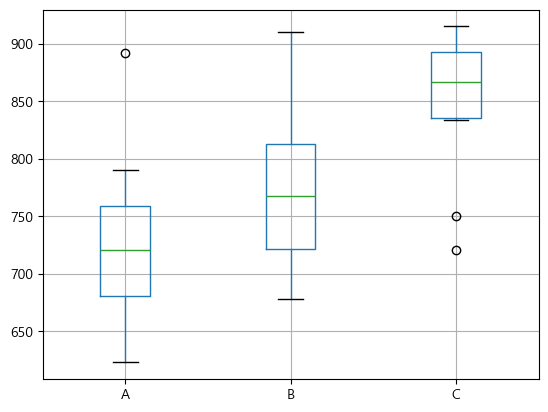

In [11]:
# Anova 검정 연습
df = pd.DataFrame({'A':[892,623,721,678,723,790,720,670,690,771],
                  'B':[721,821,910,678,723,790,711,790,745,891],
                  'C':[750,915,888,721,894,834,841,912,845,889]})

df.boxplot(['A','B','C'])

In [12]:
f_result = stats.f_oneway(df['A'],df['B'],df['C'])

f,p = f_result.statistic.round(3),f_result.pvalue.round(3)

print('One-way ANOVA')
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))

# pvalue가 0.05 보다 작다 귀무가설 기각 대립가설 채택 
# 그룹간 토익점수의 평균은 차이가 있다.
# 몇개 있냐 2saple -test를 3 번해서 알 수 있다.

One-way ANOVA
F 통계량 : 6.884
p-value : 0.004


In [13]:
# 등분산성 검정
stats.bartlett(df['A'],df['B'])

BartlettResult(statistic=0.007508528235680507, pvalue=0.930948318736008)

In [14]:
stats.bartlett(df['A'],df['C'])

BartlettResult(statistic=0.1277250351255421, pvalue=0.720802560593216)

In [15]:
stats.bartlett(df['B'],df['C'])

BartlettResult(statistic=0.19681375079809532, pvalue=0.6573050806975324)

In [16]:
# 2-Sample t-test
t_result =stats.ttest_ind(df['A'],df['B'])

# 2-sample t-test 의 값 p 값 저장
t,p = t_result.statistic.round(3),t_result.pvalue.round(4)
# 2-Sample t-test 의 t값 p 값 출력
print("2-Sample t -test ,A,B")
print(" t-통계량 : {}".format(t))
print(" p-value : {}".format(p))



2-Sample t -test ,A,B
 t-통계량 : -1.468
 p-value : 0.1594


In [17]:
# 2-Sample t-test
t_result =stats.ttest_ind(df['A'],df['C'])

# 2-sample t-test 의 값 p 값 저장
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)
# 2-Sample t-test 의 t값 p 값 출력
print("2-Sample t -test , A,C")
print(" t-통계량 : {}".format(t))
print(" p-value : {}".format(p))



2-Sample t -test , A,C
 t-통계량 : -3.808
 p-value : 0.001


In [18]:
# 2-Sample t-test
t_result =stats.ttest_ind(df['B'],df['C'])

# 2-sample t-test 의 값 p 값 저장
t,p = t_result.statistic.round(3),t_result.pvalue.round(3)
# 2-Sample t-test 의 t값 p 값 출력
print("2-Sample t -test , B,C")
print(" t-통계량 : {}".format(t))
print(" p-value : {}".format(p))



2-Sample t -test , B,C
 t-통계량 : -2.192
 p-value : 0.042


In [19]:
# 실습
# 철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데,
# 강종 별로 2차 정련 시간의 차이가 있는지와 type별로 2차 정련 시간에 차이가 있는지 검정하라
# 유의수준 0.05 , data set : Anova.csv

df = pd.read_csv('data/ANOVA.csv')
df.head()

time charge gangjong type
0  32.2      A        a    a
1  30.4      B        a    a
2  33.6      C        a    a
3  36.4      D        a    a
4  33.9      E        a    a

In [20]:
df.columns

Index(['time', 'charge', 'gangjong', 'type'], dtype='object')

In [21]:
f_result = stats.f_oneway(df['gangjong'],df['time'])

f,p = f_result.statistic.round(3),f_result.pvalue.round(3)

print('One-way ANOVA')
print('F 통계량 : {}'.format(f))
print('p-value : {}'.format(p))


ValueError: could not convert string to float: 'a'

In [22]:
import pandas as pd
import scipy.stats as stats



# 강종별 ANOVA
groups_gangjong = [df[df['gangjong'] == g]['time'] for g in df['gangjong'].unique()]
f_gangjong, p_gangjong = stats.f_oneway(*groups_gangjong)

print('One-way ANOVA for gangjong')
print('F 통계량 : {:.3f}'.format(f_gangjong))
print('p-value : {:.3f}'.format(p_gangjong))

# 타입별 ANOVA
groups_type = [df[df['type'] == t]['time'] for t in df['type'].unique()]
f_type, p_type = stats.f_oneway(*groups_type)

print('One-way ANOVA for type')
print('F 통계량 : {:.3f}'.format(f_type))
print('p-value : {:.3f}'.format(p_type))

# 둘 다 차이가 없다.

One-way ANOVA for gangjong
F 통계량 : 4.172
p-value : 0.019
One-way ANOVA for type
F 통계량 : 9.654
p-value : 0.005


In [24]:
# 상관분석 실습
# 초코칩의 강도와 재료반죽온도간에 관계를 분석하기 위한 상관분석을 하세요
df1 = [37.6,38.6,37.2,36.4,38.6,39,37.2,36.1,35.9,37.1,36.9,37.5,36.3,38.1,39,36.9,36.8,37.6,33,33.5]
df2 = [14,15,14,16,17,14,17,16,15,16,14,16,18,13,15,17,14,16,20,21]

corr,pval = stats.pearsonr(df1,df2)

print('Correlation Analysis')
print(' corr:{0:0.3f} '.format(corr))
print(' p-value : {0:0.3f}'.format(pval))

# p-value가 0.05 작기 때문에 귀무가설 기각 대립가설 채택,
# 상관계수는 0이 아니다. , 의미가 있다. , 상관계수 유의성이 있다.
# 초코칩의 강도와 재료 반죽 온도간에 관계는 매우 강한 상관성이 있다
# corr(상관계수) 값이 낮아서 p값이 바뀔 가능성이 있다.

Correlation Analysis
 corr:-0.723 
 p-value : 0.000


## 다중선형 회귀분석_연습

- 아래는 감독자의 체질검사 데이터이다. 체질 비만도를 예측하기 위한 회귀분석을
- 실시하고 결과를 해석하시오

  - 데이터 파일 : body.csv (변수 : 14, 자료 수 : 252)

In [27]:
# 데이터 처리
import pandas as pd
# 행렬 처리
import numpy as np

# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분할: train,test
from sklearn.model_selection import train_test_split
 # qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot,add_constant
# 선형 모델 formula( y~ X1 + X2 +...)
import statsmodels.formula.api as smf
# 평가함수
from statsmodels.tools.eval_measures import rmse
# 결정계쑤 평가지표
from sklearn.metrics import r2_score
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [28]:
# 한글 맑은 고딕 적용
matplotlib.rc('font',family = 'Malgun Gothic')
# 음수 값 표시
matplotlib.rc("axes",unicode_minus = False)

In [31]:
df_raw = pd.read_csv('data/body.csv')
df_raw.head()

FAT  AGE  WEIGHT  HEIGHT  NECK  CHEST  ABDOMEN    HIP  THIGH  KNEE  ANKLE  \
0  35.2   46  363.15   72.25  51.2  136.2    148.1  147.7   87.3  49.1   29.6   
1  11.8   27  168.00   71.25  38.1   93.0     79.1   94.5   57.3  36.2   24.5   
2  22.2   69  177.75   68.50  38.7  102.0     95.0   98.3   55.0  38.3   21.8   
3  10.6   57  147.75   65.75  35.2   99.6     86.4   90.1   53.0  35.0   21.3   
4  47.5   51  219.00   64.00  41.2  119.8    122.1  112.8   62.5  36.9   23.6   

   BICEPS  FOREARM  WRIST  
0    45.0     29.0   21.4  
1    29.0     30.0   18.8  
2    30.8     25.7   18.8  
3    31.7     27.3   16.9  
4    34.7     29.1   18.4

### 변수 간의 경향성 파악 - 그래프 분석

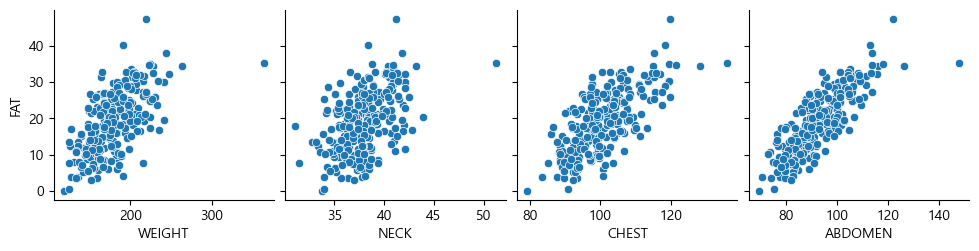

In [34]:
# 산점도 행렬
sns.pairplot(df_raw,y_vars="FAT",x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'])

# 트랜드에서 벗어나는 이상치들은 회귀 적합선에 변동 영향을 준다.

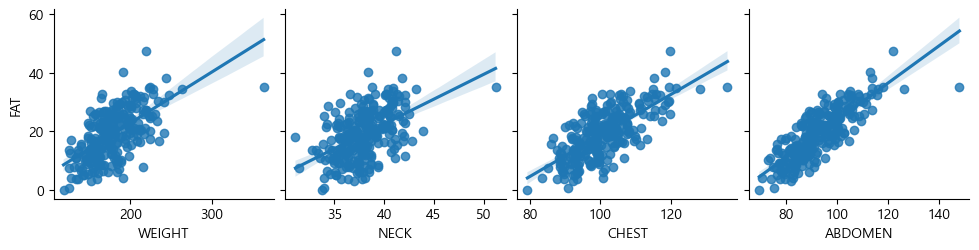

In [35]:
# 회귀 적합선 추가 : kind= "reg"
sns.pairplot(df_raw,y_vars="FAT",x_vars=['WEIGHT','NECK','CHEST','ABDOMEN'],kind="reg")              

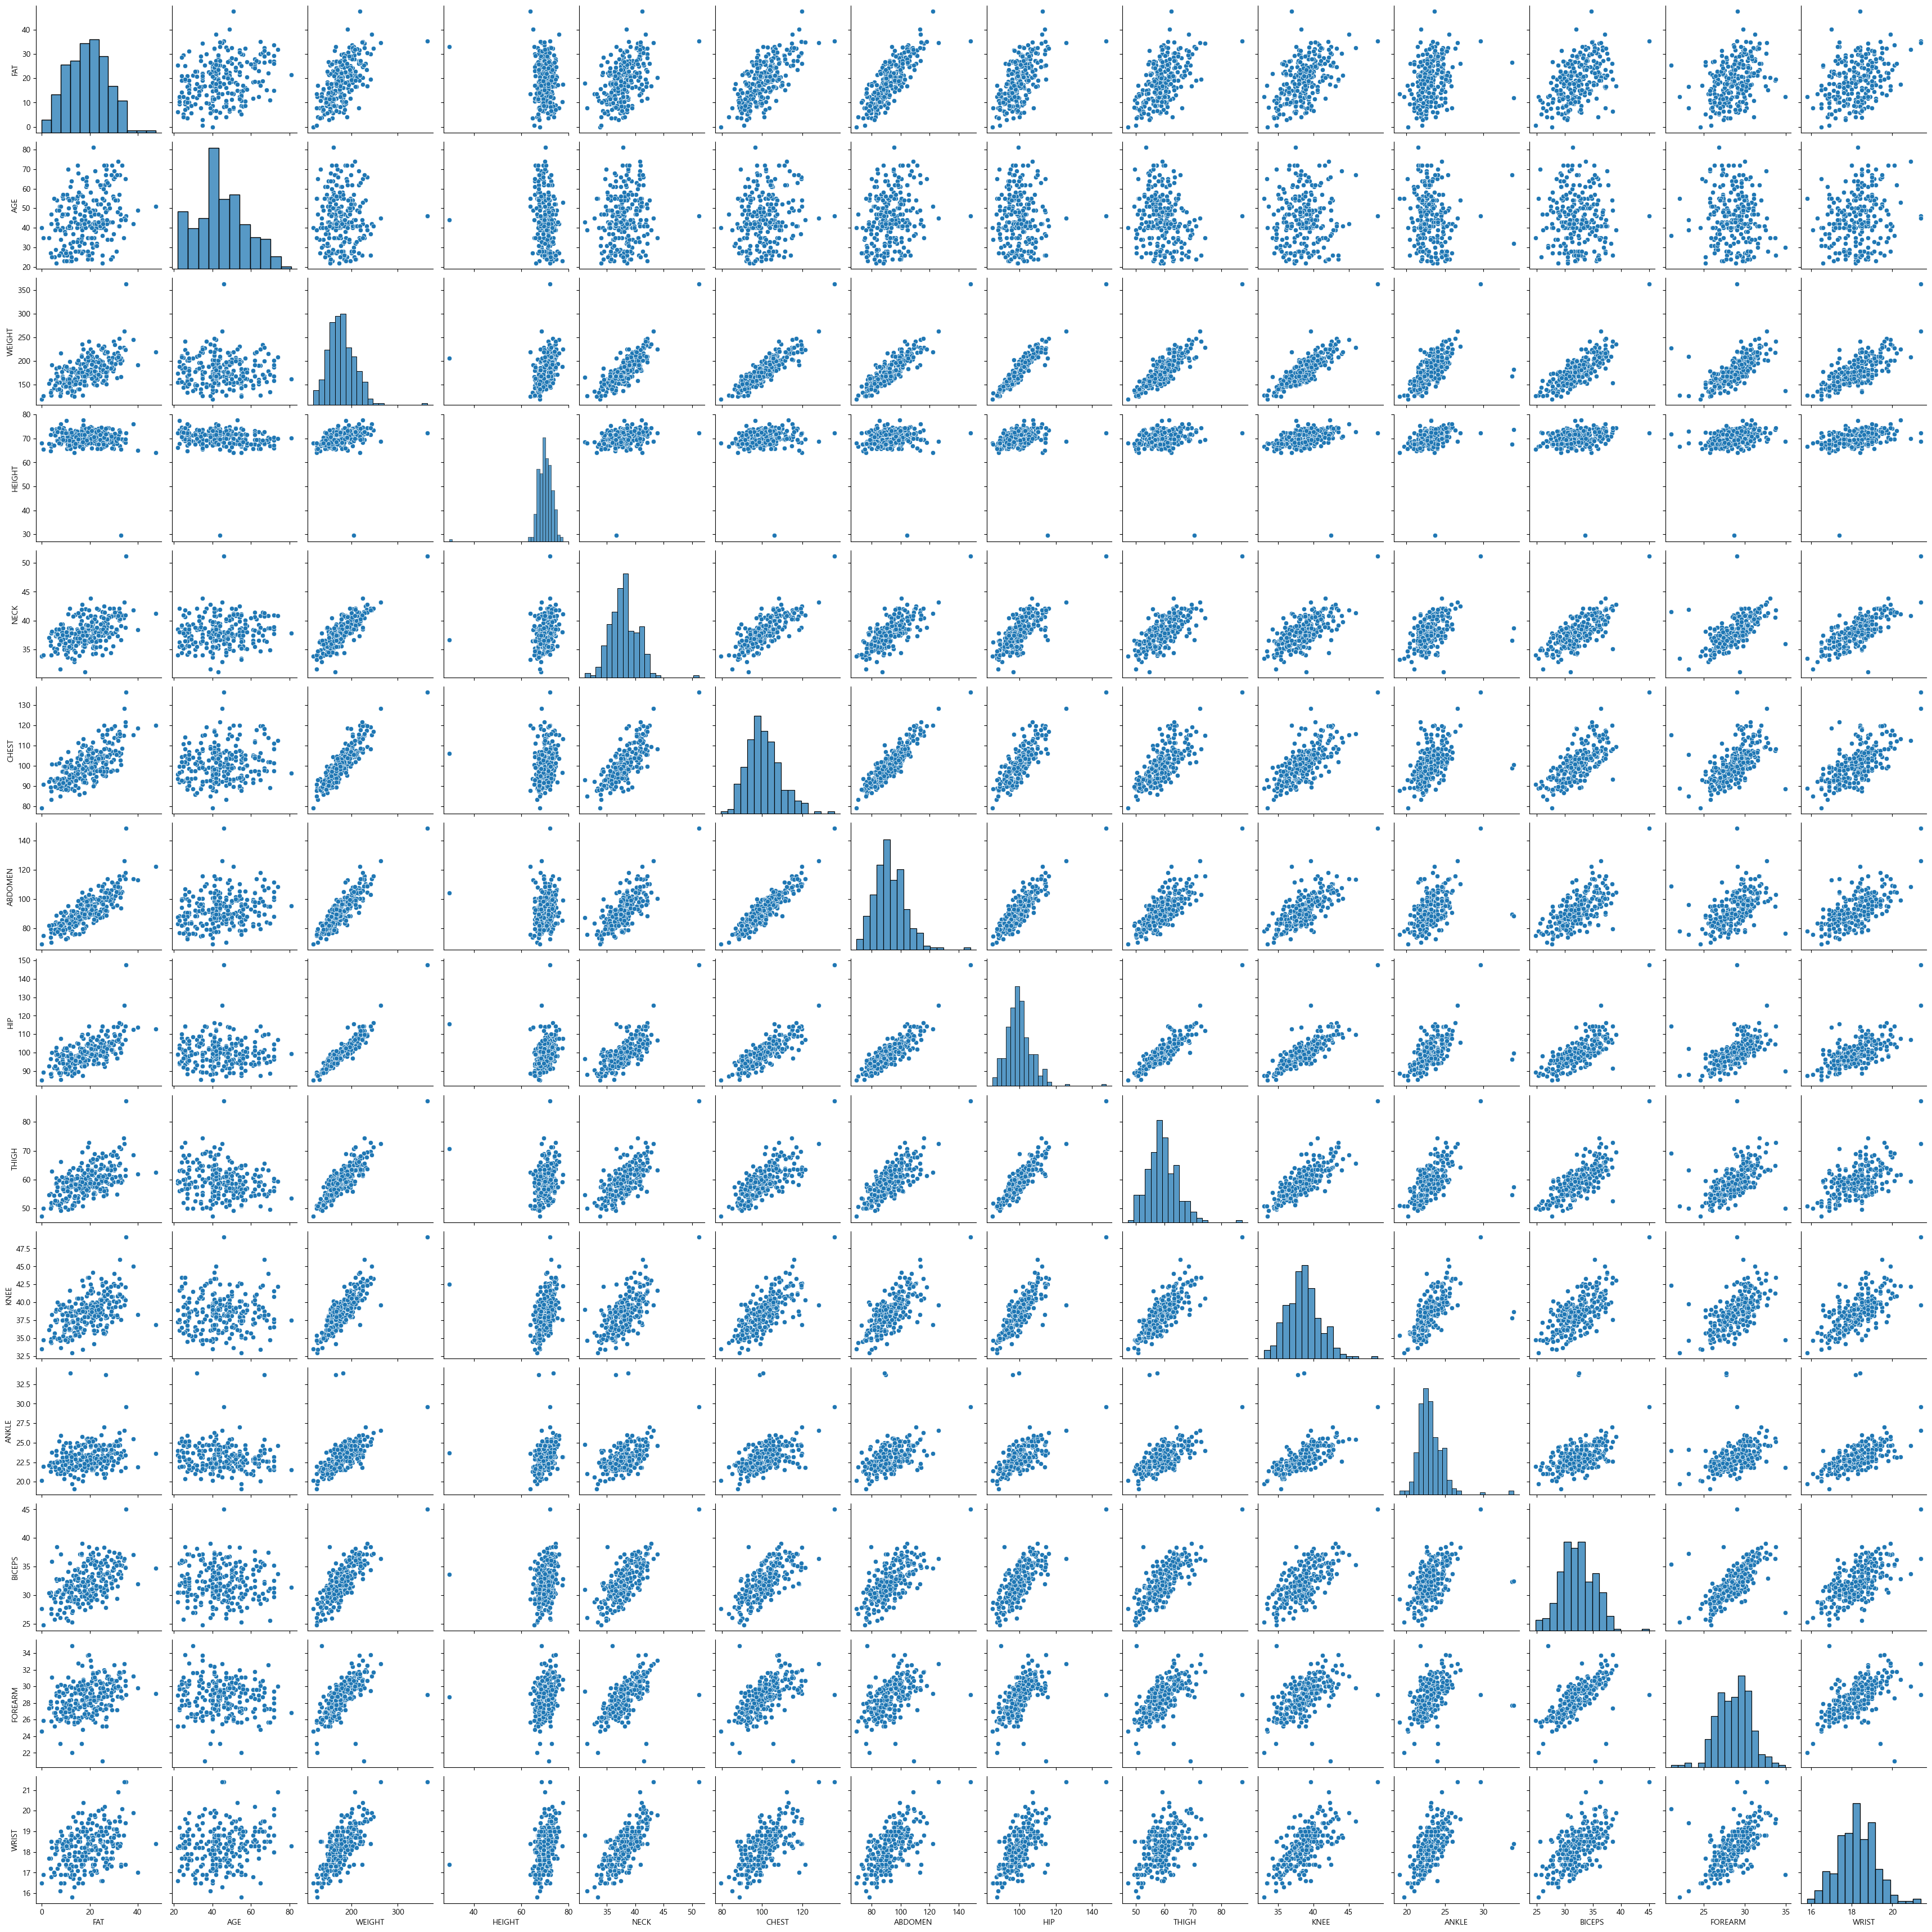

In [36]:
# 산점도 행렬
sns.pairplot(df_raw)

### 변수 간의 경향성 파악 - 상관관계 분석

In [40]:
# 상관 관계 분석
df_raw.corr().round(3)

# 체질 비만도 (FAT)와 가슴 둘레(CHEST), 복부둘레(ABDOMEN) 간의 높은 선형 관계 확인
# 설명변수 상관관계 : 다수 설명변수 간의 선형관계 확인 -> 다중공선성 확인 및 처리 필요

FAT    AGE  WEIGHT  HEIGHT   NECK  CHEST  ABDOMEN    HIP  THIGH  \
FAT      1.000  0.291   0.612  -0.089  0.491  0.703    0.813  0.625  0.560   
AGE      0.291  1.000  -0.013  -0.172  0.114  0.176    0.230 -0.050 -0.200   
WEIGHT   0.612 -0.013   1.000   0.308  0.831  0.894    0.888  0.941  0.869   
HEIGHT  -0.089 -0.172   0.308   1.000  0.254  0.135    0.088  0.170  0.148   
NECK     0.491  0.114   0.831   0.254  1.000  0.785    0.754  0.735  0.696   
CHEST    0.703  0.176   0.894   0.135  0.785  1.000    0.916  0.829  0.730   
ABDOMEN  0.813  0.230   0.888   0.088  0.754  0.916    1.000  0.874  0.767   
HIP      0.625 -0.050   0.941   0.170  0.735  0.829    0.874  1.000  0.896   
THIGH    0.560 -0.200   0.869   0.148  0.696  0.730    0.767  0.896  1.000   
KNEE     0.509  0.018   0.853   0.286  0.672  0.719    0.737  0.823  0.799   
ANKLE    0.266 -0.105   0.614   0.265  0.478  0.483    0.453  0.558  0.540   
BICEPS   0.493 -0.041   0.800   0.208  0.731  0.728    0.685  0.739  0.761   
FOREARM  0.361 -0.085   0.630   0.229  0.624  0.580    0.503  0.545  0.567   
WRIST    0.347  0.214   0.730   0.322  0.745  0.660    0.620  0.630  0.559   

          KNEE  ANKLE  BICEPS  FOREARM  WRIST  
FAT      0.509  0.266   0.493    0.361  0.347  
AGE      0.018 -0.105  -0.041   -0.085  0.214  
WEIGHT   0.853  0.614   0.800    0.630  0.730  
HEIGHT   0.286  0.265   0.208    0.229  0.322  
NECK     0.672  0.478   0.731    0.624  0.745  
CHEST    0.719  0.483   0.728    0.580  0.660  
ABDOMEN  0.737  0.453   0.685    0.503  0.620  
HIP      0.823  0.558   0.739    0.545  0.630  
THIGH    0.799  0.540   0.761    0.567  0.559  
KNEE     1.000  0.612   0.679    0.556  0.665  
ANKLE    0.612  1.000   0.485    0.419  0.566  
BICEPS   0.679  0.485   1.000    0.678  0.632  
FOREARM  0.556  0.419   0.678    1.000  0.586  
WRIST    0.665  0.566   0.632    0.586  1.000

### 회귀 모델 생성 : 설명변수 전체

In [43]:
# 학습용 / 평가용 데이터 분리
df_train,df_test = train_test_split(df_raw,test_size=0.3,random_state=77)

print("학습용 데이터 크기 : {}".format(df_train.shape))
print("평가용 데이터 크기 : {}".format(df_test.shape))

학습용 데이터 크기 : (176, 14)
평가용 데이터 크기 : (76, 14)


In [45]:
df_raw.columns

Index(['FAT', 'AGE', 'WEIGHT', 'HEIGHT', 'NECK', 'CHEST', 'ABDOMEN', 'HIP',
       'THIGH', 'KNEE', 'ANKLE', 'BICEPS', 'FOREARM', 'WRIST'],
      dtype='object')

In [47]:
# 선형 회귀 분석
reg_model = smf.ols(formula = "FAT ~ AGE+ WEIGHT+ HEIGHT+ NECK+ CHEST+ ABDOMEN+ HIP+\
THIGH+ KNEE+ ANKLE+ BICEPS+ FOREARM+ WRIST",data=df_train)

# 적합 
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     44.50
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.23e-46
Time:                        17:06:46   Log-Likelihood:                -498.42
No. Observations:                 176   AIC:                             1025.
Df Residuals:                     162   BIC:                             1069.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.9701     20.384     -0.587      0.5

In [ ]:
pip install statsmodels


In [ ]:
pip statsmodels --updated

In [53]:
# 회귀 모델 생성 : 유의하지 않은 변수 제거 (p-value < 0.05 변수 선택)

# 선형 회귀 분석
reg_model = smf.ols(formula = "FAT ~ AGE + ABDOMEN + WRIST",data=df_train)

# 적합 
reg_result = reg_model.fit()
print(reg_result.summary())

# 모델의 적합성 확인 (설명력) Anova 분석 결과 (모델 유의성 검정)
# 회귀 계수의 유의성 검정 p-value <0.05
# 잔차의 정규성 검정



                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     183.1
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           2.67e-53
Time:                        17:08:23   Log-Likelihood:                -506.01
No. Observations:                 176   AIC:                             1020.
Df Residuals:                     172   BIC:                             1033.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.0417      6.660     -1.508      0.1

### 회귀 모델 생성 : 설명변수 간의 다중공선성 확인

In [56]:
# 설명변수 간의 다중 공선성 확인
df_raw_x = df_train[['AGE' ,'ABDOMEN', 'WRIST']]
# statsmodels의 상수항 추가 함수 적용
df_raw_x_const = add_constant(df_raw_x)

# DataFrame 으로 저장
df_vif = pd.DataFrame()
df_vif['variable']=df_raw_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_raw_x_const.values,i) for i in range(df_raw_x_const.shape[1])]

# VIF
df_vif.sort_values('VIF',inplace=True)
df_vif.round(3)

# VIF 수식의 값이 10 이상이면 해당 변수가 다중공선성이 존재하는 것으로 판단 
# 반대로,1에서 10미만의 값이면 다중공선성이 문제가 되지 않는 것으로 판단
# 분석 결과, 다중공선성이 문제가 되는 변수가 발견되지 않음 

variable      VIF
1      AGE    1.050
3    WRIST    1.552
2  ABDOMEN    1.568
0    const  414.716

### 오차의 기본가정 검토
- 등분산성 검정
- 독립성 검정

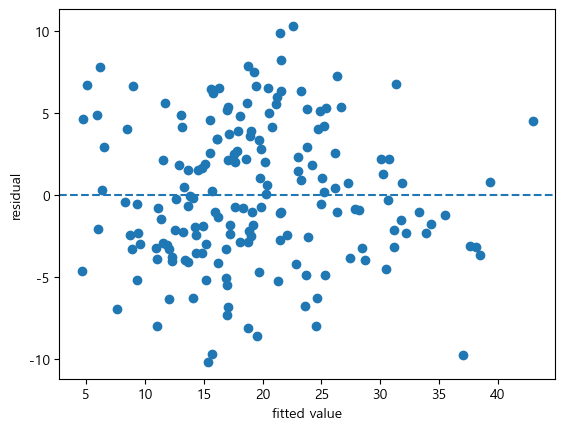

In [59]:
# 등분산성 검정
# 잔차의 등분산성 : x - 예측값 , Y - 잔차
plt.scatter(reg_result.fittedvalues,reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline(y=0, linestyle = "--")

# 잔차가 y=0을 기준으로 Random하게 산포되어있으므로 등분산성 만족

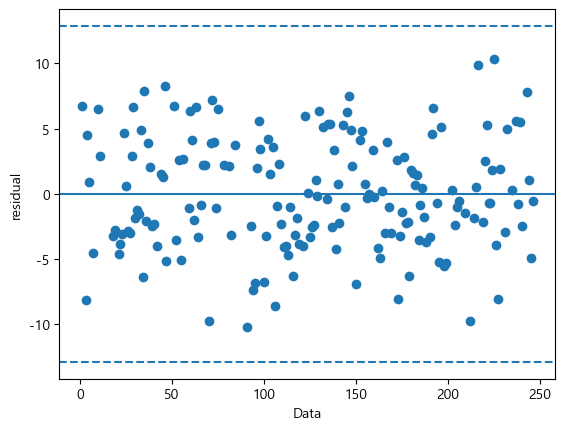

In [63]:
# 독립성 검정 -중요
# 잔차의 독립성 : x-데이터 순서, Y-잔차
plt.scatter(df_train.index,reg_result.resid , marker='o')
plt.xlabel('Data')
plt.ylabel('residual')
plt.axhline(y=0,linestyle='-')
plt.axhline(y=3*np.std(reg_result.resid),linestyle='--')
plt.axhline(y=-3*np.std(reg_result.resid),linestyle='--')

# 잔차가 관리도의 관리기준을 초과하는 데이터가 없고 경향성이 없으므로 독립성 만족

### 오차의 기본가정 검토

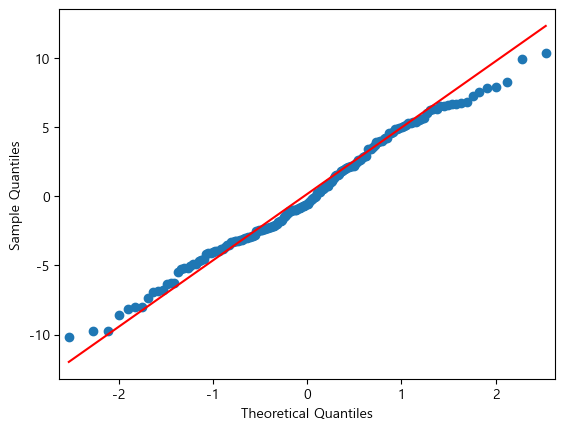

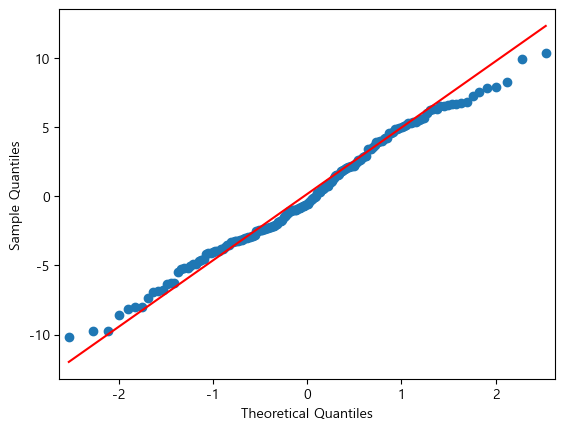

In [72]:
# 정규성검정

# 잔차 정규성 검정 : Q-Q plot
qqplot(reg_result.resid, line='q')

# 잔차항이 정규분포를 따르는 지를 검정
# 정규 확률도의 각 점들이 직선으 따라 분포하므로 정규분포를 따르는 것으로 판단
# 실제 검정 결과에도 정규성을 따르는 것으로 도출

### 최종 모델의 회귀식 FAT = -10.0417 +0.0866*AGE  +0.8075*ABDOMEN +-2.7174*WRIST  

<Axes: >

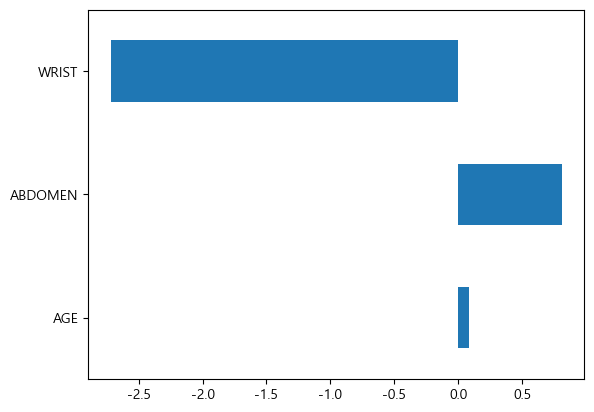

In [70]:
# 결론 도출

# 변수 중요도 확인
# 설명변수 중요도 확인
selected_cols = ['AGE' ,'ABDOMEN', 'WRIST']
df_reg_coef = pd.DataFrame({'Coef':reg_result.params.values[1:]},index= selected_cols)
df_reg_coef.plot.barh(y ='Coef',legend=False)

# 속목 두께 얇은 수록
# 복부 둘레 커질 수록
# 나이는 별로
# 체질 비만도가 높음

In [74]:
# 평가용 데이터 결정 계수 확인
y_pred = reg_result.predict(df_test)
print('평가용 데이터의 설명력:',r2_score(df_test['FAT'],y_pred))

평가용 데이터의 설명력: 0.5433876803816843


## 다중선형 회귀 분석 실습
- 아래는 당뇨병 발병원인과 관련된 데이터이다. 당뇨병 발생을 예측하기 위해 회귀분석을 실시하고 결과를 해석하시오

  - 데이터 : DIABETES.CSV (변수: 11개, 자료 수 : 442)

In [91]:
df = pd.read_csv('data/DIABETES.csv')
df.head()

Y  AGE  GENDER   BMI     BP  CHOLESTEROL    LDL   HDL  TCH     LTG  \
0  151   59       2  32.1  101.0          157   93.2  38.0  4.0  4.8598   
1   75   48       1  21.6   87.0          183  103.2  70.0  3.0  3.8918   
2  141   72       2  30.5   93.0          156   93.6  41.0  4.0  4.6728   
3  206   24       1  25.3   84.0          198  131.4  40.0  5.0  4.8903   
4  135   50       1  23.0  101.0          192  125.4  52.0  4.0  4.2905   

   GLUCOSE  
0       87  
1       69  
2       85  
3       89  
4       80

다음은 각 컬럼명이 의미하는 바입니다:

- Y: 종속 변수로, 예측하고자 하는 값입니다. 해당 데이터셋에서는 일반적으로 특정 질병의 진행 정도나 특정 건강 상태를 나타낼 수 있습니다.
- AGE: 나이, 환자의 나이를 나타냅니다.
- GENDER: 성별, 일반적으로 1은 남성, 2는 여성을 나타냅니다.
- BMI: 체질량지수 (Body Mass Index), 체중(kg)을 키의 제곱(m²)으로 나눈 값입니다.
- BP: 혈압 (Blood Pressure), 환자의 혈압 수치입니다.
- CHOLESTEROL: 총 콜레스테롤 수치, 혈액 내 총 콜레스테롤 농도를 나타냅니다.
- LDL: 저밀도 지질단백질 콜레스테롤 (Low-Density Lipoprotein), 일반적으로 '나쁜' 콜레스테롤로 알려져 있습니다.
- HDL: 고밀도 지질단백질 콜레스테롤 (High-Density Lipoprotein), 일반적으로 '좋은' 콜레스테롤로 알려져 있습니다.
- TCH: 총 콜레스테롤/HDL 비율 (Total Cholesterol to HDL ratio), 총 콜레스테롤 수치를 HDL 콜레스테롤 수치로 나눈 비율입니다.
- LTG: 혈액 내 LTG (Lamotrigine) 수치, 해당 데이터셋의 경우 다른 특정 화합물의 농도를 나타낼 수 있습니다.
- GLUCOSE: 공복 혈당 수치 (Glucose), 공복 상태에서 측정한 혈당 농도입니다

In [94]:
df.columns

Index(['Y', 'AGE', 'GENDER', 'BMI', 'BP', 'CHOLESTEROL', 'LDL', 'HDL', 'TCH',
       'LTG', 'GLUCOSE'],
      dtype='object')

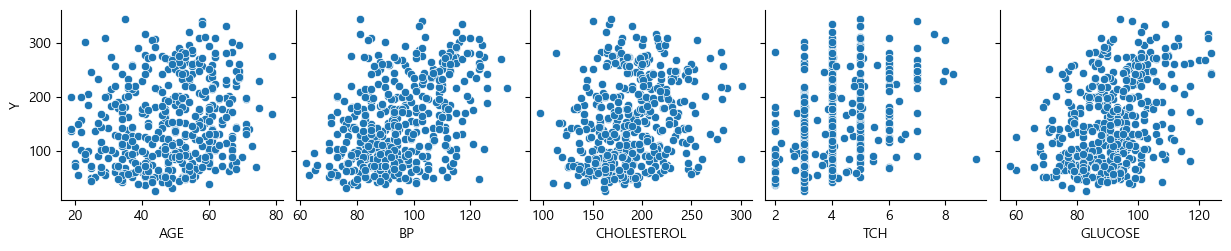

In [98]:
# 산점도 행렬
sns.pairplot(df,y_vars="Y",x_vars=['AGE','BP','CHOLESTEROL','TCH','GLUCOSE'])
               
# 트랜드에서 벗어나는 이상치들은 회귀 적합선에 변동 영향을 준다.

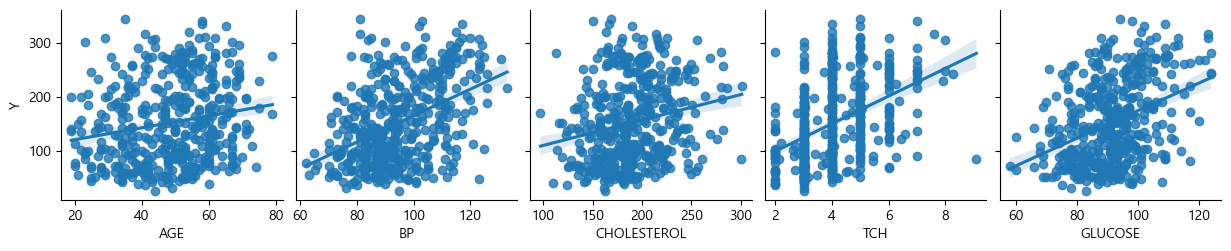

In [102]:
# 회귀 적합선 추가 : kind= "reg"
sns.pairplot(df,y_vars="Y",x_vars=['AGE','BP','CHOLESTEROL','TCH','GLUCOSE'],kind="reg")

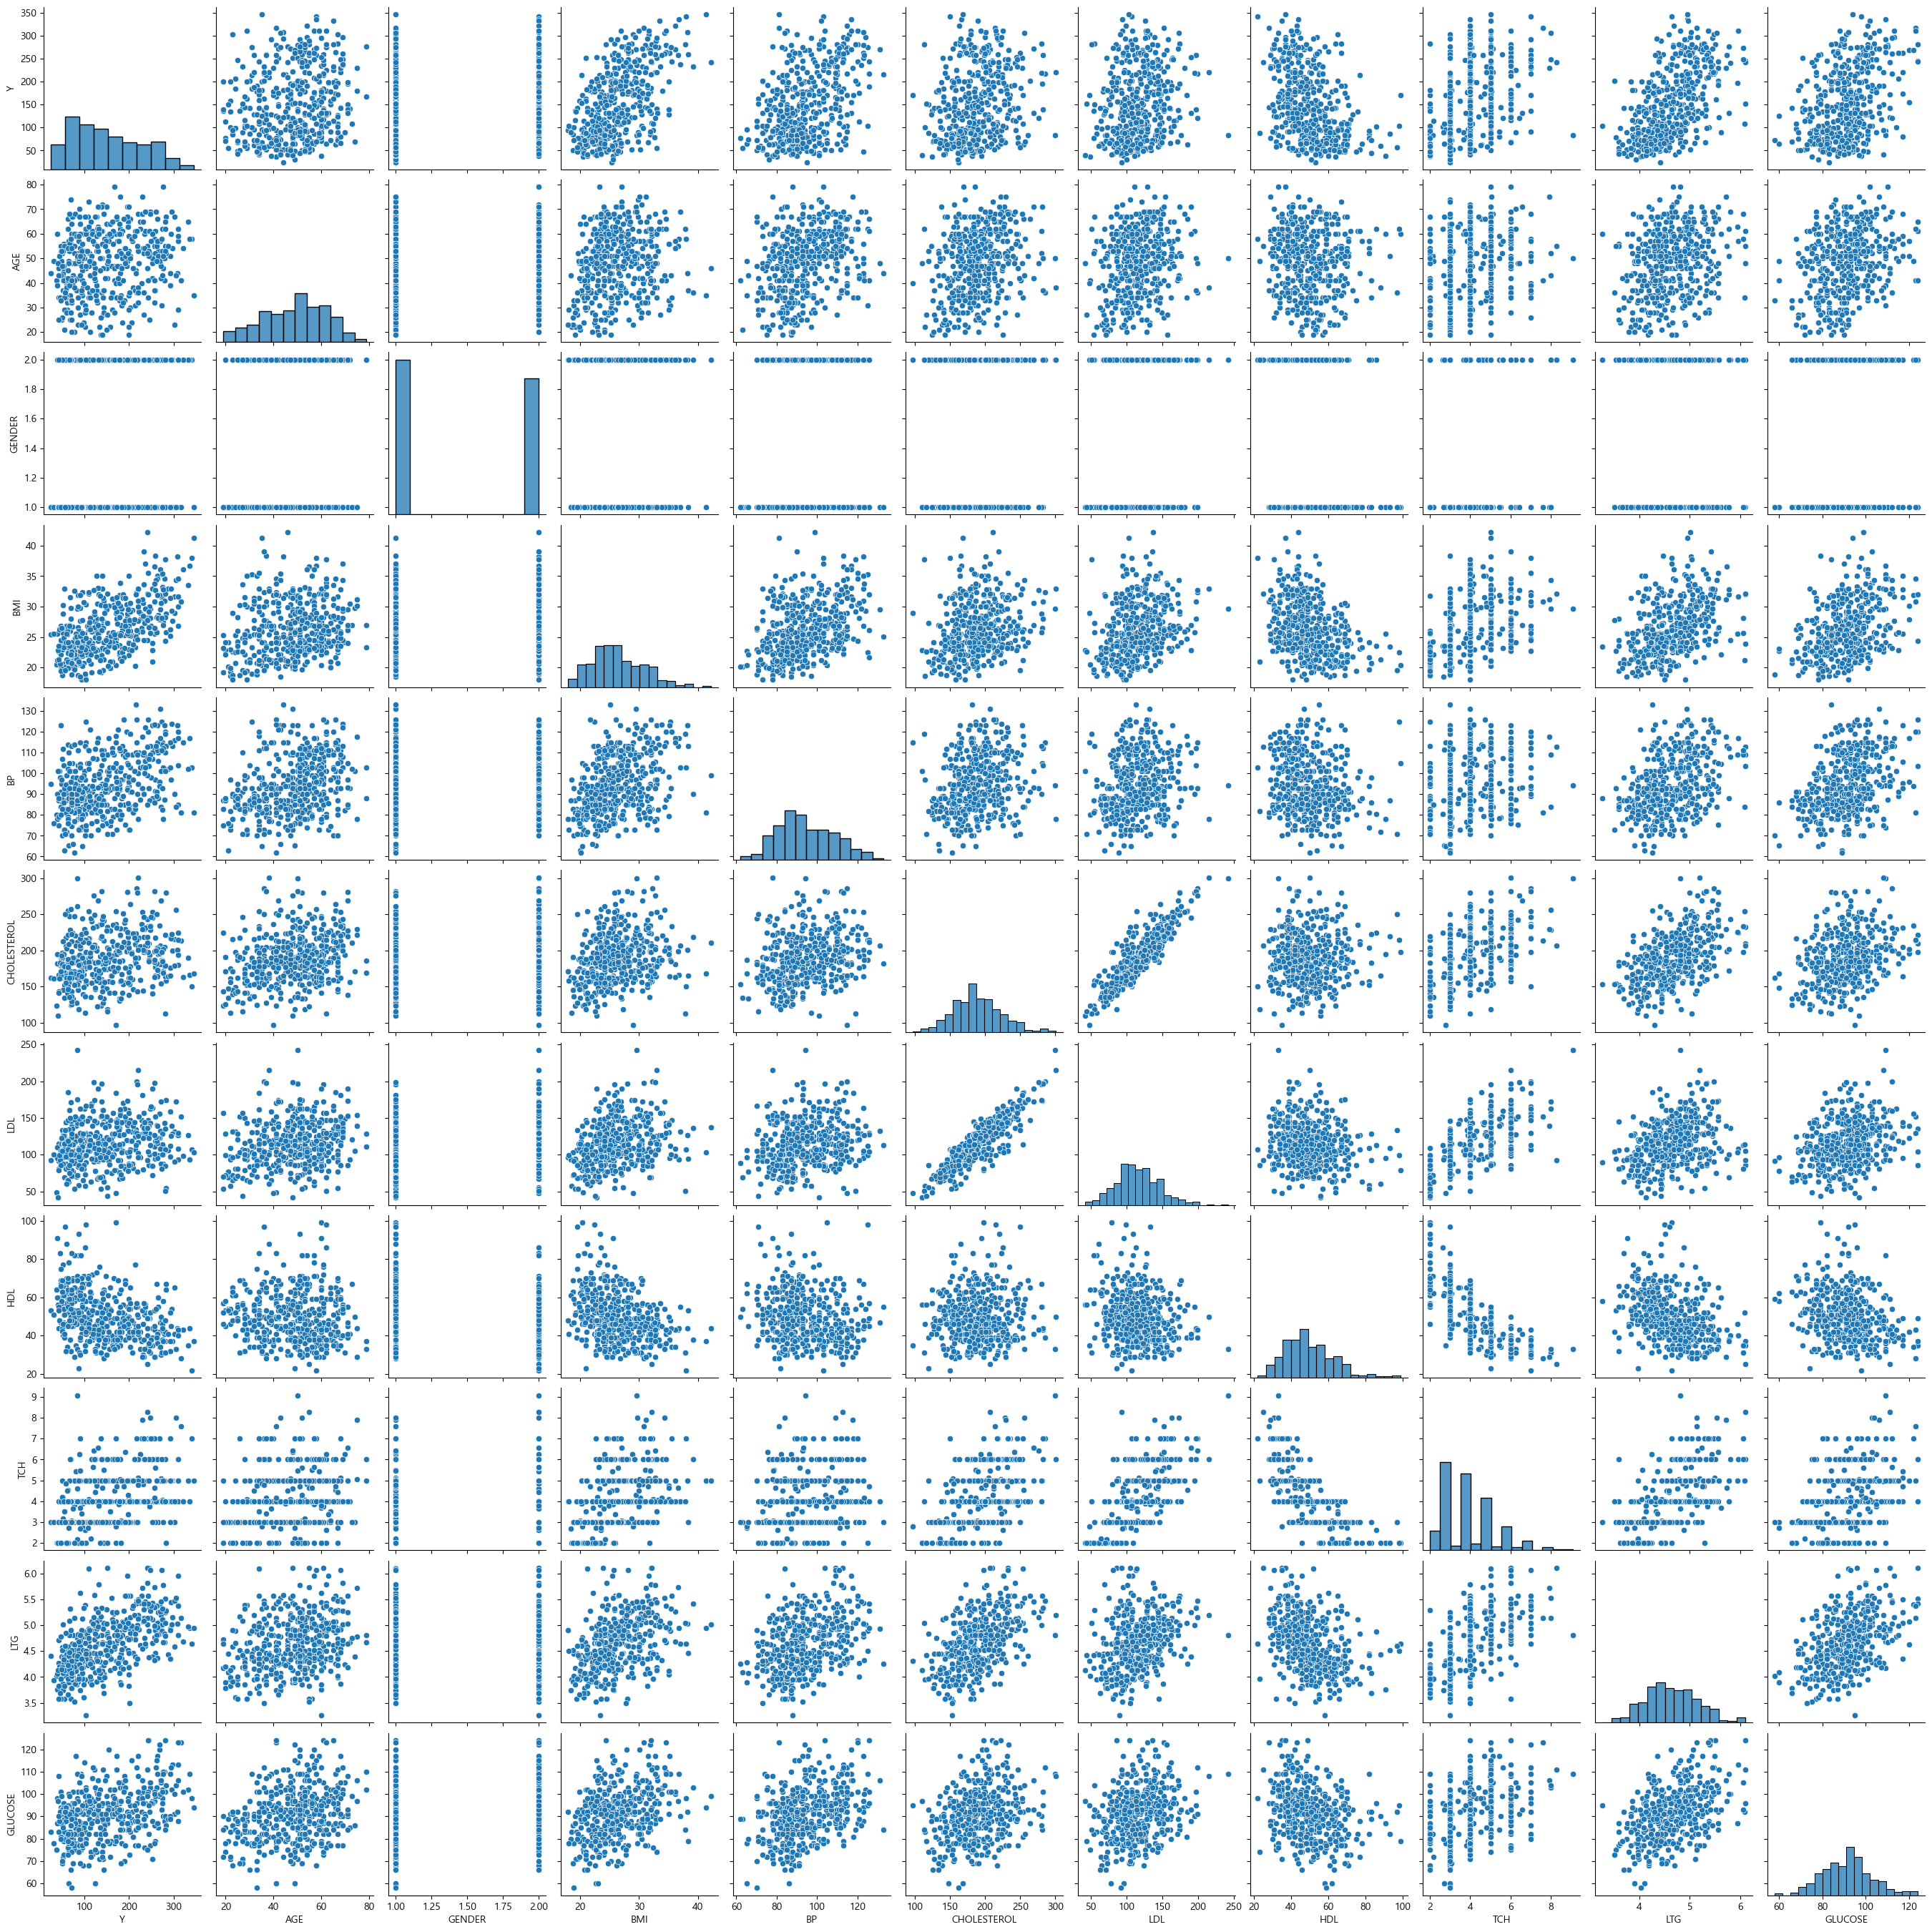

In [104]:
# 산점도 행렬
sns.pairplot(df)

In [106]:
# 학습용 / 평가용 데이터 분리
df_train,df_test = train_test_split(df,test_size=0.3,random_state=77)

print("학습용 데이터 크기 : {}".format(df_train.shape))
print("평가용 데이터 크기 : {}".format(df_test.shape))
# 선형 회귀 분석
reg_model = smf.ols(formula = "Y ~  AGE+ GENDER+ BMI+ BP+ CHOLESTEROL+ LDL+ HDL+ TCH+\
       LTG+ GLUCOSE",data=df_train)

# 적합 
reg_result = reg_model.fit()
print(reg_result.summary())

학습용 데이터 크기 : (309, 11)
평가용 데이터 크기 : (133, 11)
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     32.50
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           3.15e-42
Time:                        17:44:18   Log-Likelihood:                -1668.2
No. Observations:                 309   AIC:                             3358.
Df Residuals:                     298   BIC:                             3400.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Inte

In [ ]:
GENDER  BMI  BP LTG 

In [108]:
# 회귀 모델 생성 : 유의하지 않은 변수 제거 (p-value < 0.05 변수 선택)

# 선형 회귀 분석
reg_model = smf.ols(formula = "Y ~ GENDER  + BMI + BP+LTG ",data=df_train)

# 적합 
reg_result = reg_model.fit()
print(reg_result.summary())

# 모델의 적합성 확인 (설명력) Anova 분석 결과 (모델 유의성 검정)
# 회귀 계수의 유의성 검정 p-value <0.05
# 잔차의 정규성 검정



                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     72.52
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           4.44e-43
Time:                        17:45:29   Log-Likelihood:                -1678.7
No. Observations:                 309   AIC:                             3367.
Df Residuals:                     304   BIC:                             3386.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -326.1568     31.361    -10.400      0.0

#### 결론 도출 = -326.1568 -17.30*GENDER + 6.225*BMI +1.0393*BP 51.8913*LLTG

<Axes: >

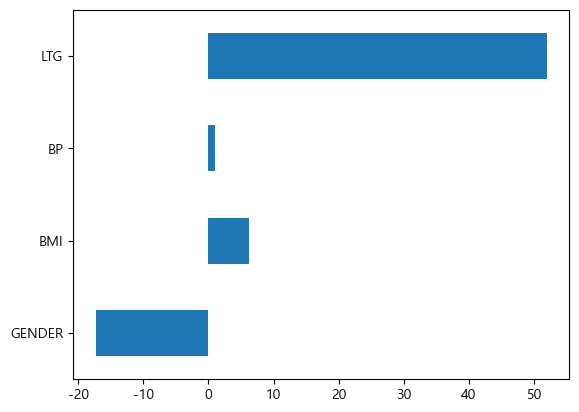

In [110]:
# 결론 도출

# 변수 중요도 확인
# 설명변수 중요도 확인
selected_cols = ['GENDER'  , 'BMI' , 'BP','LTG']
df_reg_coef = pd.DataFrame({'Coef':reg_result.params.values[1:]},index= selected_cols)
df_reg_coef.plot.barh(y ='Coef',legend=False)

# LTG 가 높을 수록 당뇨병임
# GENDER 가 낮을 수록 당뇨병에 안걸림